In [1]:
import os

from tensorflow.keras import callbacks
import tensorflow as tf
import umap

from utilities.classification_utils import ClassificationModel
from utilities.data_preparation import FilePreparation, DataPreparation
from utilities.settings import Settings

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
files = [os.path.abspath(os.path.join("./references", p)) for p in os.listdir("./references")]
files.pop(3)
settings = Settings()
file_preparation = FilePreparation(files=files, settings=settings)
dataframe = file_preparation.get_aggregated()
reducer = umap.UMAP(n_components=3, n_neighbors=25, min_dist=0.1, metric="euclidean", n_jobs=8)
embeddings = reducer.fit_transform(dataframe)
labels = file_preparation.get_labels()
labels_shape = file_preparation.get_labels_shape()
data_preparation = DataPreparation(dataframe=dataframe, embeddings=embeddings, labels=labels, batch_size=128)
training_set, test_set = data_preparation.create_datasets()
feature_shape = None
for elem in training_set.take(1):
 	feature_shape = elem[0]["standard"][0].shape

# After modification ClassificationModel needs extra arguments at class instantiating
model = ClassificationModel(num_classes=labels_shape, num_features=feature_shape).get_model()

2022-05-16 23:03:46.113447: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 23:03:46.113567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [3]:
def plot():
	from matplotlib import pyplot as plt

	plt.figure(figsize=(15,8))
	plt.subplot(1, 2, 1)
	plt.plot(history.history["accuracy"])
	plt.plot(history.history["val_accuracy"])
	plt.title("Model Accuracy")
	plt.ylabel("Accuracy")
	plt.xlabel("Epoch")
	plt.legend(["Train", "Validation"], loc="upper left")

	plt.subplot(1, 2, 2)
	plt.plot(history.history["loss"])
	plt.plot(history.history["val_loss"])
	plt.title("Loss Function")
	plt.ylabel("Loss")
	plt.xlabel("Epoch")
	plt.legend(["Train", "Validation"], loc="upper left")
	plt.show()

In [4]:
# V11. Batch Size 32, learning rate constant 1e-5.
checkpoint_cb = callbacks.ModelCheckpoint("classifier_11_32.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=100, callbacks = [checkpoint_cb])

Epoch 1/100


2022-05-16 16:12:55.682374: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 16:12:55.682514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1893/1893 [==============================] - ETA: 0s - loss: 2.5440 - accuracy: 0.2008

2022-05-16 16:13:19.071245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1893/1893 [==============================] - 26s 13ms/step - loss: 2.5440 - accuracy: 0.2008 - val_loss: 2.1494 - val_accuracy: 0.3576
Epoch 2/100
1893/1893 [==============================] - 25s 13ms/step - loss: 2.1737 - accuracy: 0.3290 - val_loss: 1.9777 - val_accuracy: 0.3802
Epoch 3/100
1893/1893 [==============================] - 25s 13ms/step - loss: 2.0290 - accuracy: 0.3616 - val_loss: 1.8709 - val_accuracy: 0.3945
Epoch 4/100
1893/1893 [==============================] - 24s 13ms/step - loss: 1.9427 - accuracy: 0.3777 - val_loss: 1.8159 - val_accuracy: 0.4090
Epoch 5/100
1893/1893 [==============================] - 24s 13ms/step - loss: 1.8778 - accuracy: 0.3877 - val_loss: 1.7546 - val_accuracy: 0.4197
Epoch 6/100
1893/1893 [==============================] - 24s 13ms/step - loss: 1.8377 - accuracy: 0.3958 - val_loss: 1.7351 - val_accuracy: 0.4238
Epoch 7/100
1893/1893 [==============================] - 24s 13ms/step - loss: 1.8027 - accuracy: 0.4036 - val_loss: 1.6817 - val_

Epoch 1/200


2022-05-16 16:57:13.887027: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 16:57:13.887131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


237/237 [==============================] - ETA: 0s - loss: 2.9700 - accuracy: 0.0854

2022-05-16 16:57:17.674895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


237/237 [==============================] - 5s 15ms/step - loss: 2.9700 - accuracy: 0.0854 - val_loss: 2.5248 - val_accuracy: 0.1306
Epoch 2/200
237/237 [==============================] - 3s 14ms/step - loss: 2.6719 - accuracy: 0.1364 - val_loss: 2.3301 - val_accuracy: 0.2863
Epoch 3/200
237/237 [==============================] - 3s 14ms/step - loss: 2.5179 - accuracy: 0.1831 - val_loss: 2.2370 - val_accuracy: 0.3273
Epoch 4/200
237/237 [==============================] - 3s 14ms/step - loss: 2.4179 - accuracy: 0.2195 - val_loss: 2.1563 - val_accuracy: 0.3497
Epoch 5/200
237/237 [==============================] - 3s 14ms/step - loss: 2.3374 - accuracy: 0.2500 - val_loss: 2.1024 - val_accuracy: 0.3642
Epoch 6/200
237/237 [==============================] - 3s 14ms/step - loss: 2.2677 - accuracy: 0.2751 - val_loss: 2.0494 - val_accuracy: 0.3768
Epoch 7/200
237/237 [==============================] - 3s 14ms/step - loss: 2.2169 - accuracy: 0.2932 - val_loss: 2.0049 - val_accuracy: 0.3836
Epoc

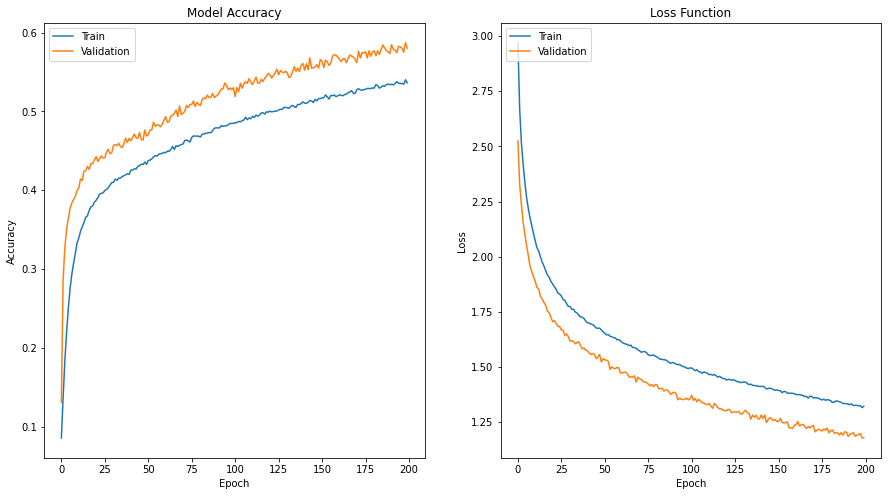

In [4]:
# V11. Batch Size 256, learning rate constant 1e-5.
checkpoint_cb = callbacks.ModelCheckpoint("classifier_11_256.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [checkpoint_cb])

plot()

In [ ]:
# V12. Batch Size 32, learning rate constant 1e-5.
checkpoint_cb = callbacks.ModelCheckpoint("classifier_12_32.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [checkpoint_cb])

plot()

Epoch 1/200


2022-05-16 21:11:11.190588: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 21:11:11.190693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1893/1893 [==============================] - ETA: 0s - loss: 1.8719 - accuracy: 0.3829

2022-05-16 21:11:49.580796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1893/1893 [==============================] - 43s 22ms/step - loss: 1.8719 - accuracy: 0.3829 - val_loss: 1.5545 - val_accuracy: 0.4803
Epoch 2/200
1893/1893 [==============================] - 42s 22ms/step - loss: 1.5228 - accuracy: 0.4881 - val_loss: 1.3874 - val_accuracy: 0.5276
Epoch 3/200
1893/1893 [==============================] - 41s 22ms/step - loss: 1.4090 - accuracy: 0.5214 - val_loss: 1.2899 - val_accuracy: 0.5635
Epoch 4/200
1893/1893 [==============================] - 40s 21ms/step - loss: 1.3228 - accuracy: 0.5460 - val_loss: 1.2172 - val_accuracy: 0.5861
Epoch 5/200
1893/1893 [==============================] - 43s 23ms/step - loss: 1.2652 - accuracy: 0.5633 - val_loss: 1.1629 - val_accuracy: 0.6032
Epoch 6/200
1893/1893 [==============================] - 42s 22ms/step - loss: 1.2279 - accuracy: 0.5734 - val_loss: 1.1363 - val_accuracy: 0.6089
Epoch 7/200
1893/1893 [==============================] - 42s 22ms/step - loss: 1.1900 - accuracy: 0.5845 - val_loss: 1.0885 - val_

In [ ]:
# V12. Batch Size 256, learning rate constant 1e-5.
checkpoint_cb = callbacks.ModelCheckpoint("classifier_12_256.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [checkpoint_cb])

plot()

Epoch 1/200


2022-05-16 21:42:35.863086: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 21:42:35.863179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


237/237 [==============================] - ETA: 0s - loss: 2.2200 - accuracy: 0.2930

2022-05-16 21:42:41.722868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


237/237 [==============================] - 7s 27ms/step - loss: 2.2200 - accuracy: 0.2930 - val_loss: 2.3218 - val_accuracy: 0.2020
Epoch 2/200
237/237 [==============================] - 6s 26ms/step - loss: 1.7497 - accuracy: 0.4238 - val_loss: 1.6809 - val_accuracy: 0.4420
Epoch 3/200
237/237 [==============================] - 6s 25ms/step - loss: 1.6180 - accuracy: 0.4571 - val_loss: 1.5609 - val_accuracy: 0.4754
Epoch 4/200
237/237 [==============================] - 6s 25ms/step - loss: 1.5378 - accuracy: 0.4813 - val_loss: 1.4914 - val_accuracy: 0.4990
Epoch 5/200
237/237 [==============================] - 6s 26ms/step - loss: 1.4742 - accuracy: 0.5027 - val_loss: 1.4423 - val_accuracy: 0.5129
Epoch 6/200
237/237 [==============================] - 6s 26ms/step - loss: 1.4217 - accuracy: 0.5212 - val_loss: 1.3898 - val_accuracy: 0.5288
Epoch 7/200
237/237 [==============================] - 6s 26ms/step - loss: 1.3808 - accuracy: 0.5343 - val_loss: 1.3470 - val_accuracy: 0.5446
Epoc

Epoch 1/200


2022-05-16 21:45:32.961101: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 21:45:32.961200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - ETA: 0s - loss: 2.8219 - accuracy: 0.1468

2022-05-16 21:45:36.668817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 5s 31ms/step - loss: 2.8219 - accuracy: 0.1468 - val_loss: 4.6050 - val_accuracy: 0.0797
Epoch 2/200
119/119 [==============================] - 4s 29ms/step - loss: 2.0562 - accuracy: 0.3304 - val_loss: 2.4009 - val_accuracy: 0.2065
Epoch 3/200
119/119 [==============================] - 3s 29ms/step - loss: 1.8148 - accuracy: 0.4067 - val_loss: 1.8426 - val_accuracy: 0.3844
Epoch 4/200
119/119 [==============================] - 3s 29ms/step - loss: 1.7039 - accuracy: 0.4355 - val_loss: 1.6751 - val_accuracy: 0.4450
Epoch 5/200
119/119 [==============================] - 3s 29ms/step - loss: 1.6309 - accuracy: 0.4545 - val_loss: 1.5822 - val_accuracy: 0.4658
Epoch 6/200
119/119 [==============================] - 4s 29ms/step - loss: 1.5722 - accuracy: 0.4705 - val_loss: 1.5489 - val_accuracy: 0.4747
Epoch 7/200
119/119 [==============================] - 4s 30ms/step - loss: 1.5260 - accuracy: 0.4845 - val_loss: 1.5064 - val_accuracy: 0.4836
Epoc

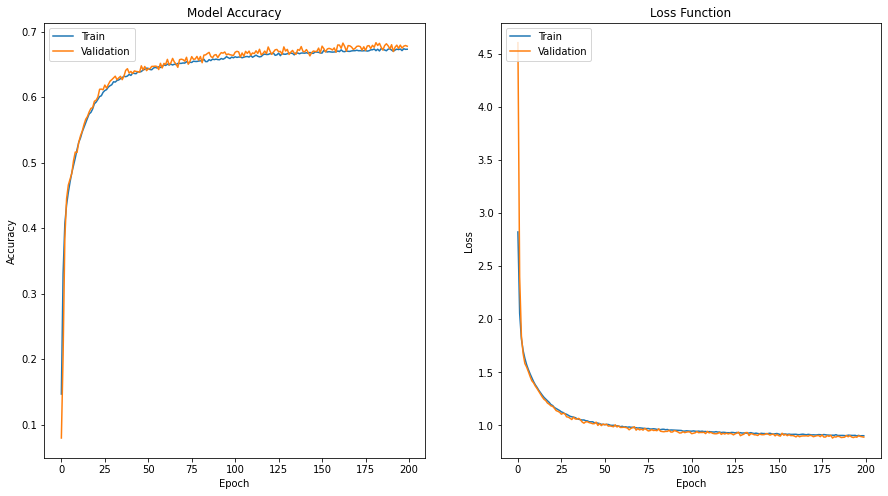

In [5]:
# V12. Batch Size 512, learning rate constant 1e-5.
checkpoint_cb = callbacks.ModelCheckpoint("classifier_12_512.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [checkpoint_cb])

plot()


Epoch 1: LearningRateScheduler setting learning rate to 0.02.
Epoch 1/200


2022-05-16 22:11:56.983936: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 22:11:56.984050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - ETA: 0s - loss: 2.0055 - accuracy: 0.4503

2022-05-16 22:12:00.129523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 4s 28ms/step - loss: 2.0055 - accuracy: 0.4503 - val_loss: 4.2583 - val_accuracy: 0.2850 - lr: 0.0200

Epoch 2: LearningRateScheduler setting learning rate to 0.01809674836071919.
Epoch 2/200
119/119 [==============================] - 3s 27ms/step - loss: 1.2532 - accuracy: 0.5507 - val_loss: 3.8627 - val_accuracy: 0.3447 - lr: 0.0181

Epoch 3: LearningRateScheduler setting learning rate to 0.016374615061559638.
Epoch 3/200
119/119 [==============================] - 3s 26ms/step - loss: 1.1822 - accuracy: 0.5763 - val_loss: 1.3516 - val_accuracy: 0.5501 - lr: 0.0164

Epoch 4: LearningRateScheduler setting learning rate to 0.014816364413634358.
Epoch 4/200
119/119 [==============================] - 3s 26ms/step - loss: 1.1703 - accuracy: 0.5797 - val_loss: 4.7795 - val_accuracy: 0.3696 - lr: 0.0148

Epoch 5: LearningRateScheduler setting learning rate to 0.013406400920712786.
Epoch 5/200
119/119 [==============================] - 3s 25ms/step -

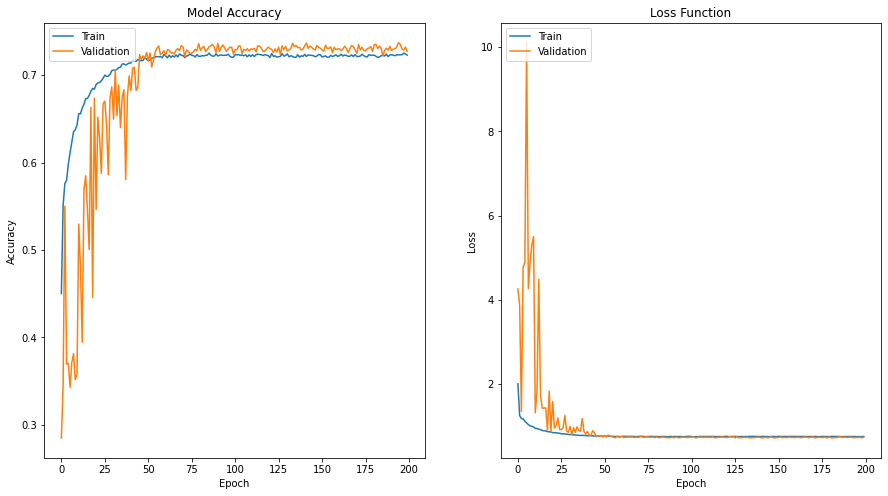

In [4]:
# V13. Batch Size 512, initial learning rate 1e-2.
import math

def lr_exp_decay(epoch, lr):
    k = 0.1
    return 0.02 * math.exp(-k*epoch)

learning_rate = callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)

checkpoint_cb = callbacks.ModelCheckpoint("classifier_13_512.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [learning_rate, checkpoint_cb])

plot()

Epoch 1/200


2022-05-16 22:25:06.806507: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 22:25:06.806608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - ETA: 0s - loss: 2.4203 - accuracy: 0.2177

2022-05-16 22:25:09.946372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 4s 28ms/step - loss: 2.4203 - accuracy: 0.2177 - val_loss: 4.3149 - val_accuracy: 0.0880
Epoch 2/200
119/119 [==============================] - 3s 26ms/step - loss: 1.9171 - accuracy: 0.3819 - val_loss: 2.2748 - val_accuracy: 0.2699
Epoch 3/200
119/119 [==============================] - 3s 26ms/step - loss: 1.7478 - accuracy: 0.4272 - val_loss: 1.7597 - val_accuracy: 0.4293
Epoch 4/200
119/119 [==============================] - 3s 26ms/step - loss: 1.6592 - accuracy: 0.4514 - val_loss: 1.6322 - val_accuracy: 0.4590
Epoch 5/200
119/119 [==============================] - 3s 26ms/step - loss: 1.5918 - accuracy: 0.4741 - val_loss: 1.5623 - val_accuracy: 0.4823
Epoch 6/200
119/119 [==============================] - 3s 26ms/step - loss: 1.5383 - accuracy: 0.4902 - val_loss: 1.5183 - val_accuracy: 0.4933
Epoch 7/200
119/119 [==============================] - 3s 26ms/step - loss: 1.5010 - accuracy: 0.5005 - val_loss: 1.4929 - val_accuracy: 0.5006
Epoc

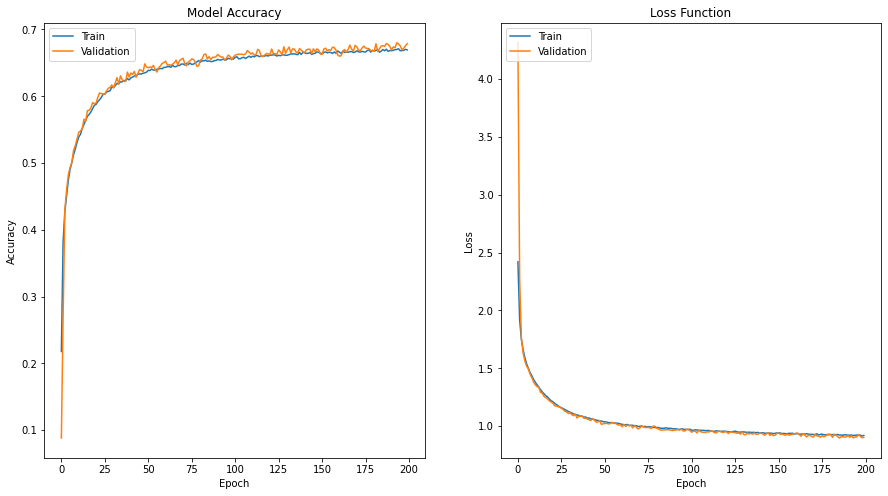

In [4]:
# V13. Batch Size 512, Constant learning rate 1e-5.

checkpoint_cb = callbacks.ModelCheckpoint("classifier_13_512_1.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [checkpoint_cb])

plot()


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/200


2022-05-16 22:41:02.063516: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 22:41:02.063591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - ETA: 0s - loss: 2.2637 - accuracy: 0.3767

2022-05-16 22:41:05.399421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 4s 29ms/step - loss: 2.2637 - accuracy: 0.3767 - val_loss: 1.6586 - val_accuracy: 0.4404 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999950475222136.
Epoch 2/200
119/119 [==============================] - 3s 28ms/step - loss: 1.6530 - accuracy: 0.4324 - val_loss: 1.5954 - val_accuracy: 0.4535 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999850417881948.
Epoch 3/200
119/119 [==============================] - 3s 27ms/step - loss: 1.5482 - accuracy: 0.4683 - val_loss: 1.5158 - val_accuracy: 0.4941 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00099997003037048.
Epoch 4/200
119/119 [==============================] - 3s 28ms/step - loss: 1.4502 - accuracy: 0.4962 - val_loss: 1.3389 - val_accuracy: 0.5348 - lr: 9.9997e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009999500133441531.
Epoch 5/200
119/119 [==============================] -

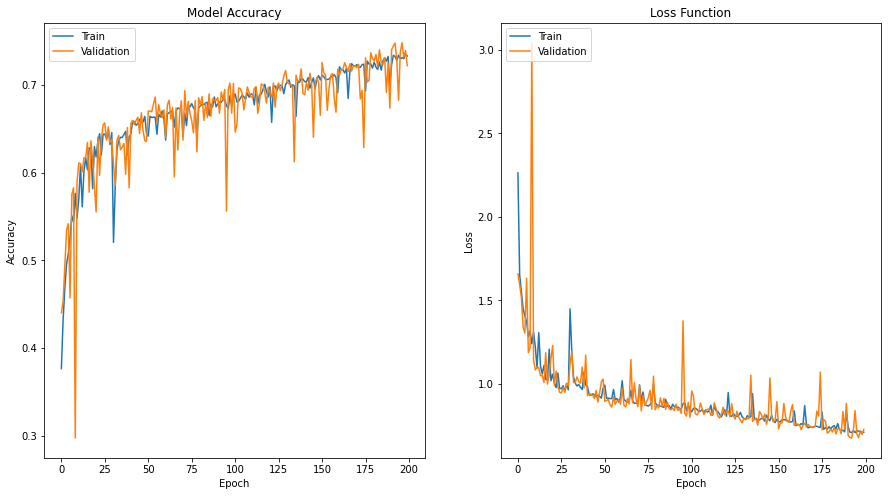

In [4]:
# V14. Batch Size 512, initial learning rate 1e-3.

initial_learning_rate = 0.001
epochs = 200
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

learning_rate = callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)
checkpoint_cb = callbacks.ModelCheckpoint("classifier_14_512.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=200, callbacks = [learning_rate, checkpoint_cb])

plot()


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/500


2022-05-16 23:03:49.085678: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 23:03:49.085758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - ETA: 0s - loss: 1.8830 - accuracy: 0.4001

2022-05-16 23:03:58.822952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - 11s 23ms/step - loss: 1.8830 - accuracy: 0.4001 - val_loss: 1.8055 - val_accuracy: 0.3437 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999980475013564.
Epoch 2/500
474/474 [==============================] - 10s 22ms/step - loss: 1.5493 - accuracy: 0.4658 - val_loss: 1.5034 - val_accuracy: 0.4665 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999940684607064.
Epoch 3/500
474/474 [==============================] - 10s 22ms/step - loss: 1.3073 - accuracy: 0.5420 - val_loss: 1.4205 - val_accuracy: 0.5082 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000999988110387376.
Epoch 4/500
474/474 [==============================] - 10s 22ms/step - loss: 1.1645 - accuracy: 0.5839 - val_loss: 1.2479 - val_accuracy: 0.5448 - lr: 9.9999e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009999800568788481.
Epoch 5/500
474/474 [============================

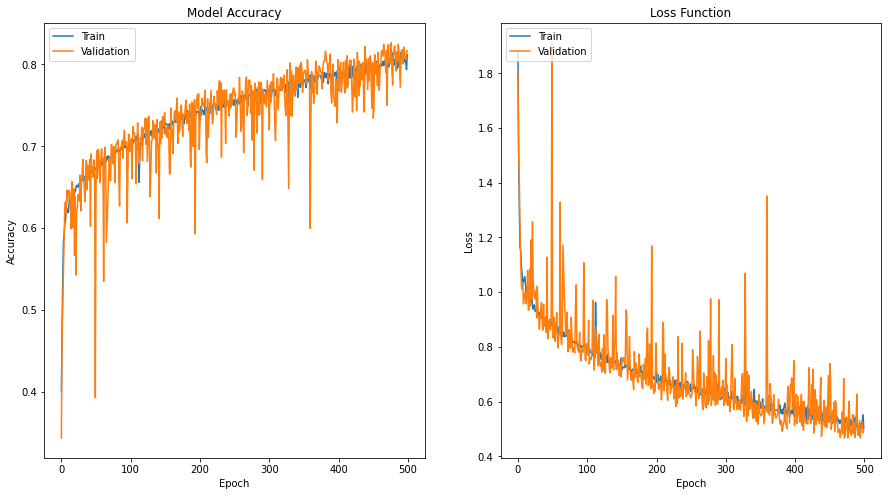

In [4]:
# V14. Batch Size 128, initial learning rate 1e-3.

initial_learning_rate = 0.001
epochs = 500
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

learning_rate = callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)
checkpoint_cb = callbacks.ModelCheckpoint("classifier_14_128.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=500, callbacks = [learning_rate, checkpoint_cb])

plot()